In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grad-admission/Graduate_Admission_2_1610_28.csv


In [155]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [156]:
#loading the data
grad_data = pd.read_csv("/kaggle/input/grad-admission/Graduate_Admission_2_1610_28.csv")
grad_data.head()

,Unnamed: 0,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
0,1,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,5,314,103,2,2.0,3.0,8.21,0,0.65


In [157]:
grad_data.columns

Index(['Unnamed: 0', 'Serial.No.', 'GRE.Score', 'TOEFL.Score',
       'University.Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance.of.Admit'],
      dtype='object')

In [158]:
#getting rid of the unnnamed and Serial number columns as they are not uneeded
grad_data = grad_data.drop(["Unnamed: 0", "Serial.No."], axis = 1)
grad_data.head()

,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [159]:
#checking for null values
grad_data.isnull().sum()

GRE.Score            0
TOEFL.Score          0
University.Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance.of.Admit      0
dtype: int64

# EDA

In [160]:
grad_data.describe()

,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


the 75% percentile which is the third quartile (Q3) has the value: 0.82. Our threshold will be above 0.82 which is 0.83.

Checking the correlation coefficient between each of the independebt variables and the dependent variable (Chance.of.Admit)

### GRE Score and Chance of Admit

In [ ]:
grad_data[["GRE.Score", "Chance.of.Admit"]].corr()

### TOEFL Score and Chance of Admit

In [ ]:
grad_data[["TOEFL.Score", "Chance.of.Admit"]].corr()

### University Rating and Chance of Admit

In [ ]:
grad_data[["University.Rating", "Chance.of.Admit"]].corr()

### SOP and Chance of Admit

In [ ]:
grad_data[["SOP", "Chance.of.Admit"]].corr()

In [ ]:
#LOR and Chance of Admit
grad_data[["LOR", "Chance.of.Admit"]].corr()

### CGPA and Chance of Admit

In [ ]:
grad_data[["CGPA", "Chance.of.Admit"]].corr()

### Research and Chance of Admit

In [ ]:
grad_data[["Research", "Chance.of.Admit"]].corr()

After running the above correlations, GRE.Score, TOEFL.Score and CGPA had a very good fit and as well very much important fo gaining admission into the university unlike the other features.

# Visualising

In [ ]:
#Putting the Correlation Coefficients in a heatmap
sns.heatmap(grad_data.corr(), annot = True).set_title("Correlation Coefficient", color = "orange", size = "15")

the heatmap as well shows the GRE.Score, TOEFL.Score and CGPA have a stronger relationship with Chance of getting admitted.

In [ ]:
#showing chance of admit and cgpa in a scatterplot with the university rating
sns.scatterplot(x = "CGPA", y = "Chance.of.Admit", data = grad_data, palette = sns.color_palette("dark", 5), hue = "University.Rating")
sns.despine()

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(grad_data["SOP"], grad_data["Chance.of.Admit"], color ='maroon',
        width = 0.4)
plt.title("Chance of Getting Admission by University Rating")
plt.xlabel("SOP")
plt.ylabel("Chance of Admission")
plt.show()

sop isn't as strong as the other features

Comparing the three strong features together with chances of getting admitted

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(x = "CGPA", y = "GRE.Score", data = grad_data, hue = "Chance.of.Admit")
plt.title("GRE Score and CGPA Comparison")
plt.xlabel("GRE Score", fontsize = 10)
plt.ylabel("CGPA", fontsize = 10)
sns.despine()
plt.show()

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(x = "CGPA", y = "TOEFL.Score", data = grad_data, hue = "Chance.of.Admit")
plt.title("TOEFL Score and CGPA Comparison")
plt.xlabel("TOEFL Score", fontsize = 10)
plt.ylabel("CGPA", fontsize = 10)
sns.despine()
plt.show()


# Model Prediction using Regression Algorithm (Supervied Learning)

In [ ]:
#splitting grad_data into independent variable (x) and dependent variable (y)
x = grad_data.drop(["Chance.of.Admit"], axis = 1)
y = grad_data["Chance.of.Admit"]
x.head()

In [ ]:
y.head()

In [ ]:
#splitting x and y into training and tests sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# Importing the MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Normalizing (scaling) the training data
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

# Normalizing (scaling) the test data using the same scaler
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])


In [178]:
#setting the threshold for classification
threshold = 0.83 #which is from the chance of admit third quartile above 0.82

#creating binary labels for the training set
cy_train = [1 if chance > threshold else 0 for chance in y_train]
cy_train = np.array(cy_train)

#creating binary labels for the test set
cy_test = [1 if chance > threshold else 0 for chance in y_test]
cy_test = np.array(cy_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression Accuracy: 0.920
--------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        76
           1       0.75      1.00      0.86        24

    accuracy                           0.92       100
   macro avg       0.88      0.95      0.90       100
weighted avg       0.94      0.92      0.92       100



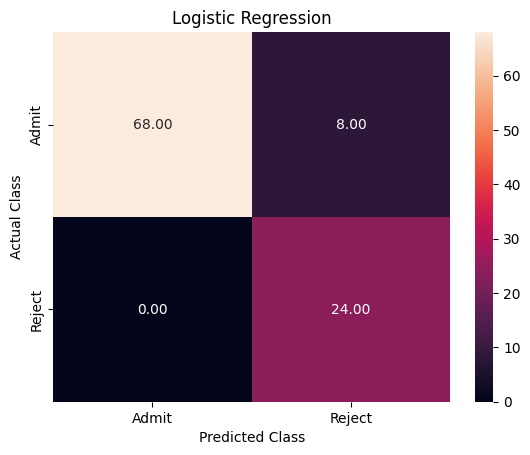

In [179]:
#incorporating models and checking which performed better and fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#creating a Linear Regression model
model1 = LogisticRegression(max_iter = 1000)
#fitting the model on the training data
model1.fit(x_train_scaled, cy_train)
#predicting the target variable on the test set
model1_pred = model1.predict(x_test)

#printing accuracy scoew
acc_score = accuracy_score(cy_test, model1_pred)
print("Logistic Regression Accuracy: {:.3f}".format(acc_score))

#printing classification report
print("-" * 20)
print(classification_report(cy_test, model1_pred))

#creating a confusion matrix
conf_mat = confusion_matrix(cy_test, model1_pred)
sns.heatmap(conf_mat, annot = True,  fmt = ".2f", xticklabels = ["Admit", "Reject"], yticklabels = ["Admit", "Reject"])
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.title("Logistic Regression")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Decision Tree Accuracy: 0.770
--------------------
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        76
           1       0.54      0.29      0.38        24

    accuracy                           0.77       100
   macro avg       0.67      0.61      0.62       100
weighted avg       0.74      0.77      0.74       100



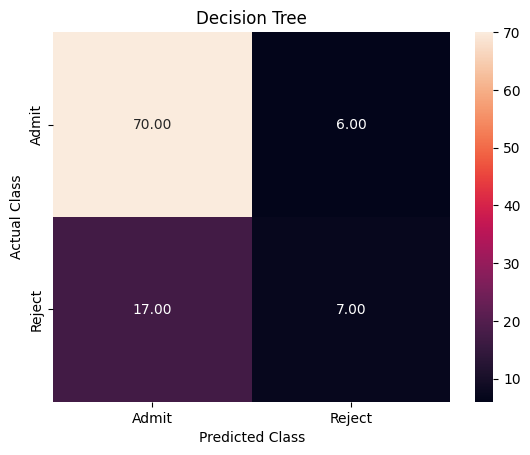

In [180]:
#creating a Linear Regression model
model2 = DecisionTreeRegressor()
#fitting the model on the training data
model2.fit(x_train_scaled, cy_train)
#predicting the target variable on the test set
model2_pred = model2.predict(x_test)

#printing accuracy scoew
acc_score2 = accuracy_score(cy_test, model2_pred)
print("Decision Tree Accuracy: {:.3f}".format(acc_score2))

#printing classification report
print("-" * 20)
print(classification_report(cy_test, model2_pred))

#creating a confusion matrix
conf_mat = confusion_matrix(cy_test, model2_pred)
sns.heatmap(conf_mat, annot = True,  fmt = ".2f", xticklabels = ["Admit", "Reject"], yticklabels = ["Admit", "Reject"])
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.title("Decision Tree")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest Accuracy: 0.920
--------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        76
           1       1.00      0.42      0.59        24

    accuracy                           0.86       100
   macro avg       0.92      0.71      0.75       100
weighted avg       0.88      0.86      0.84       100



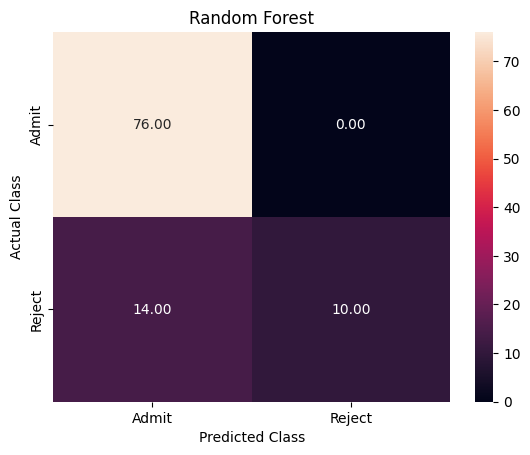

In [181]:
#creating a Linear Regression model
model3 = RandomForestClassifier()
#fitting the model on the training data
model3.fit(x_train_scaled, cy_train)
#predicting the target variable on the test set
model3_pred = model3.predict(x_test)

#printing accuracy scoew
acc_score3 = accuracy_score(cy_test, model1_pred)
print("Random Forest Accuracy: {:.3f}".format(acc_score3))

#printing classification report
print("-" * 20)
print(classification_report(cy_test, model3_pred))

#creating a confusion matrix
conf_mat = confusion_matrix(cy_test, model3_pred)
sns.heatmap(conf_mat, annot = True,  fmt = ".2f", xticklabels = ["Admit", "Reject"], yticklabels = ["Admit", "Reject"])
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.title("Random Forest")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVM Accuracy: 0.950
--------------------
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       0.85      0.96      0.90        24

    accuracy                           0.95       100
   macro avg       0.92      0.95      0.93       100
weighted avg       0.95      0.95      0.95       100



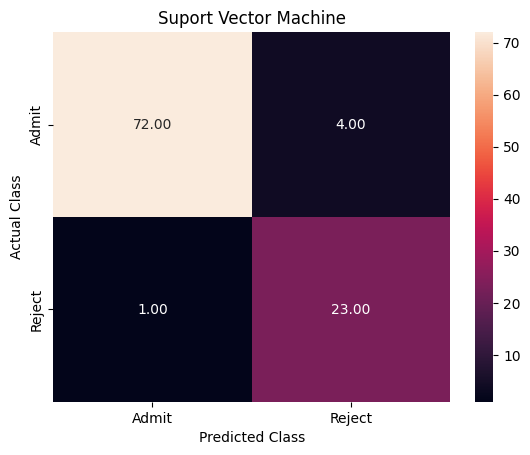

In [182]:
#creating a Linear Regression model
model4 = SVC()
#fitting the model on the training data
model4.fit(x_train_scaled, cy_train)
#predicting the target variable on the test set
model4_pred = model4.predict(x_test)

#printing accuracy scoew
acc_score4 = accuracy_score(cy_test, model4_pred)
print("SVM Accuracy: {:.3f}".format(acc_score4))

#printing classification report
print("-" * 20)
print(classification_report(cy_test, model4_pred))

#creating a confusion matrix
conf_mat = confusion_matrix(cy_test, model4_pred)
sns.heatmap(conf_mat, annot = True,  fmt = ".2f", xticklabels = ["Admit", "Reject"], yticklabels = ["Admit", "Reject"])
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.title("Suport Vector Machine")
plt.show()

SVM performed best followed by Logistic Regression.
SVM model is very accurate, achieving 95% correctness across both classes. It excels in predicting admissions ("Admit") with high precision and recall. It also performs very well in predicting rejections ("Reject") with high recall. The weighted average F1-Score is 95%, indicating a balanced performance considering both classes.

In simple terms, the SVM model is doing exceptionally well. It rarely makes mistakes in predicting both admissions and rejections, and it's good at capturing instances where it should say "Admit" or "Reject."